This notebook will make plots of the emu accuracy and compare it to the other error estimates. 

Considering how I want to make these. I am currently leaning toward showing fractional accuracy against the test sample. Could also show the covmats/etc but not worried about that RN. 

I also am considering showing the emu prediction of the test sample I had shown, or even a fit to it? Dunno if thats necessary. 

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()
#import matplotlib.colors as colors
sns.set_palette('deep')
plt.rcParams.update({'font.size': 18})

In [21]:
import numpy as np
from pearce.emulator import LemonPepperWet
from glob import  glob
from os import path

In [22]:
current_palette = sns.color_palette()
model_color_map = {'HOD': (current_palette[0], "GnBu_d"),
                    'HSAB': (current_palette[1], "YlGn_d"),
                   'SHAM': (current_palette[2], "OrRd_d"),
                   'CAB': (current_palette[3], "RdPu_d"),
                   'CorrAB': (current_palette[4], "YlOrBr_d"),
                    'Halos': (current_palette[5], 'PuBu_d')}

In [23]:
models = ['CAB', 'CorrAB', 'HSAB', 'HOD']

In [24]:
all_fnames = sorted(glob('/u/ki/swmclau2/des/Aemulators/%s_*_h/*.hdf5'%'ds'))
print all_fnames

['/u/ki/swmclau2/des/Aemulators/ds_cab_h/PearceDsCABCosmo.hdf5', '/u/ki/swmclau2/des/Aemulators/ds_cab_test_h/PearceDsCABCosmoTest.hdf5', '/u/ki/swmclau2/des/Aemulators/ds_corrab_h/PearceDsCorrABCosmo.hdf5', '/u/ki/swmclau2/des/Aemulators/ds_corrab_test_h/PearceDsCorrABCosmoTest.hdf5', '/u/ki/swmclau2/des/Aemulators/ds_hsab_h/PearceDsHSABCosmo.hdf5', '/u/ki/swmclau2/des/Aemulators/ds_hsab_test_h/PearceHSABDsCosmoTest.hdf5', '/u/ki/swmclau2/des/Aemulators/ds_zheng07_h/PearceDsCosmo.hdf5', '/u/ki/swmclau2/des/Aemulators/ds_zheng07_test_h/PearceDsCosmoTest.hdf5']


In [31]:
accs = np.zeros((4,2,18))

for j,obs in enumerate(['wp', 'ds']):
    all_fnames = sorted(glob('/u/ki/swmclau2/des/Aemulators/%s_*_h/*.hdf5'%obs))
    test_fnames, train_fnames = [],[]

    for f in all_fnames:
        if 'test' in f:
            test_fnames.append(f)
        else:
            train_fnames.append(f)
    
    print len(test_fnames), len(train_fnames)
    for i, (train_fname, test_fname) in enumerate(zip(train_fnames, test_fnames)):
        emu = LemonPepperWet(train_fname, fixed_params = {'z':0.0})
        #print train_fname, test_fname
        pred_y, data_y = emu.goodness_of_fit(test_fname, statistic=None)
        #print data_y, pred_y
        accs[i,j] = (np.abs(10**pred_y-10**data_y)/np.abs(10**data_y)).mean(axis=1)
        #print '*'*30


4 4
(40, 7) (7,) (1000, 9) (9,)
(35, 7) (7,) (100, 9) (9,)
(40, 7) (7,) (1000, 7) (7,)
(35, 7) (7,) (100, 7) (7,)
(40, 7) (7,) (1000, 7) (7,)
(35, 7) (7,) (100, 7) (7,)
(40, 7) (7,) (1000, 5) (5,)
(35, 7) (7,) (100, 5) (5,)
4 4
(40, 7) (7,) (1000, 9) (9,)
(35, 7) (7,) (100, 9) (9,)
(40, 7) (7,) (1000, 7) (7,)
(35, 7) (7,) (100, 7) (7,)
(40, 7) (7,) (1000, 7) (7,)
(35, 7) (7,) (100, 7) (7,)
(40, 7) (7,) (1000, 5) (5,)
(35, 7) (7,) (100, 5) (5,)


In [43]:
print accs.mean(axis=2)

[[0.03490684 0.03093737]
 [0.03324749 0.0231774 ]
 [0.03011608 0.02122812]
 [0.02486008 0.03143718]]


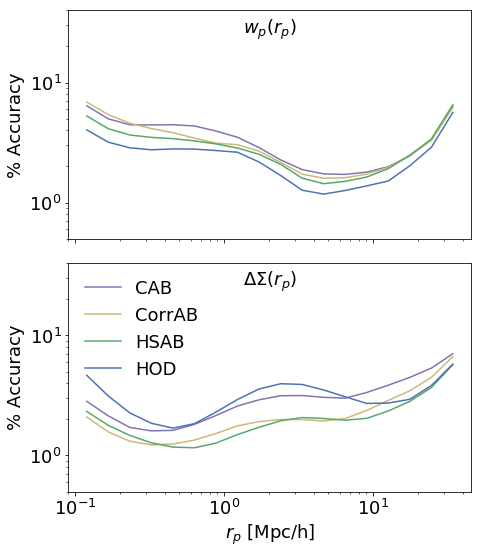

In [45]:
fig, axes = plt.subplots(2,1, figsize = (7,2*4), sharex=True)
for i, model in enumerate(models):
    for j in xrange(2):
        axes[j].plot(emu.scale_bin_centers, accs[i,j]*100, color = model_color_map[model][0], label = model)
        axes[j].set_ylim([5e-3*100, 4e-1*100])
        axes[j].loglog();
        axes[j].set_ylabel('% Accuracy')

axes[1].legend(loc=2, frameon=False)

axes[0].text(.5,.9, r'$w_p(r_p)$',
                horizontalalignment='center',
                transform=axes[0].transAxes)
axes[1].text(.5,.9, r'$\Delta \Sigma(r_p)$',
                horizontalalignment='center',
                transform=axes[1].transAxes)

axes[1].set_xlabel(r'$r_p$ [Mpc/h]')
fig.tight_layout()